In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv("diabetes.csv")
# Print shape of dataset
print(df1.shape)

(768, 9)


In [2]:
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

from sklearn.impute import KNNImputer


# Initialize the imputer
imputer = KNNImputer(n_neighbors=3)

# Impute the null values
imputed_df = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)
imputed_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.000000,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,166.666667,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.333333,120.666667,30.1,0.349,47.0,1.0


In [3]:
X=imputed_df.drop('Outcome',axis=1)
y=imputed_df['Outcome']

In [12]:
from imblearn.combine import SMOTETomek,SMOTEENN

smt=SMOTEENN(random_state=42,sampling_strategy='minority')
print("before sampling target data has 0 and 1 with ",np.bincount(y)," values and difference between them is",abs(np.diff((np.bincount(y)))))
X_res,y_res=smt.fit_resample(X,y)
print("after sampling target data has 0 and 1 with  ",np.bincount(y_res)," values and difference between them is",abs(np.diff((np.bincount(y_res)))))

before sampling target data has 0 and 1 with  [500 268]  values and difference between them is [232]
after sampling target data has 0 and 1 with   [239 317]  values and difference between them is [78]


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=0)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

In [15]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    f1 = f1_score(true, predicted) # Calculate F1-score
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, precision, recall, f1 , roc_auc

In [16]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    
}

Decision Tree
Model performance for Test set:
- Accuracy: 0.9581
- ROC AUC Score: 0.9564


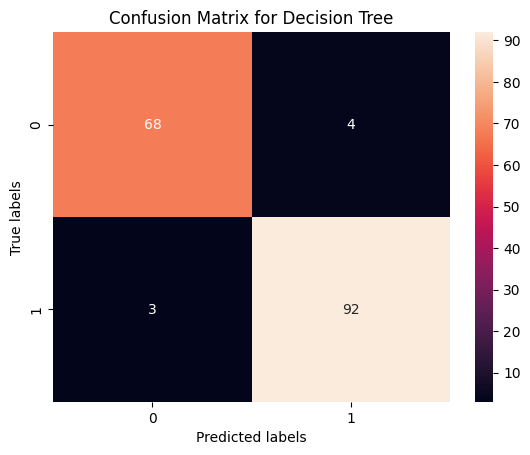

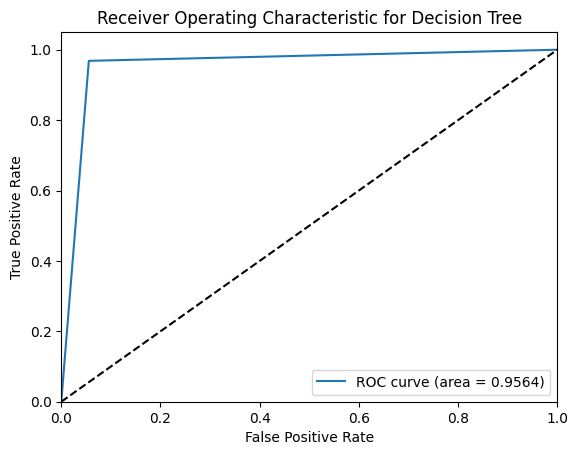

In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, y_test, and models

model_name = 'Decision Tree'  # Specify the name of the model you want to evaluate
model = models[model_name]

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_test_pred = model.predict(X_test)

# Model performance
accuracy = model.score(X_test, y_test)
auc_value = roc_auc_score(y_test, y_test_pred)

print(model_name)
print('Model performance for Test set:')
print('- Accuracy: {:.4f}'.format(accuracy))
print('- ROC AUC Score: {:.4f}'.format(auc_value))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for ' + model_name)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, label='ROC curve (area = {:.4f})'.format(auc_value))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for ' + model_name)
plt.legend(loc='lower right')
plt.show()
